In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import glob
#import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(rgb):
	r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
	gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
	return gray

In [3]:
files = glob.glob("/scratch2/Lava/*png")

## Look at an image

In [4]:
name = files[0]
im = Image.open(name)
im = im.resize((512,288))

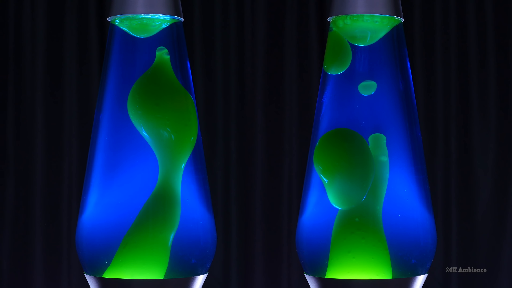

In [5]:
im

In [8]:
RGB = np.array(im)

In [9]:
np.shape(RGB)

(288, 512, 3)

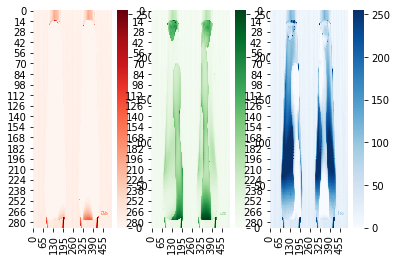

In [8]:
plt.subplot(1, 3, 1)
sn.heatmap(RGB[:,:,0],cmap='Reds')
plt.subplot(1, 3, 2)
sn.heatmap(RGB[:,:,1],cmap='Greens')
plt.subplot(1, 3, 3)
sn.heatmap(RGB[:,:,2],cmap='Blues')

## Process Data

In [6]:
files = glob.glob("/scratch2/Lava/*png")
print len(files)
LL = len(files)

8681


In [7]:
x_train = np.zeros((LL,288,256,1))
y_train = np.zeros((LL,288,256,3))

In [8]:
for i in range(LL):
    name = files[i]
    im = Image.open(name)
    im = im.resize((512,288))
    RGB = np.array(im)
    gray = rgb2gray(RGB)
    x_train[i] = np.reshape(np.array([gray[:,0:512/2]]),(288,256,1))/255.
    y_train[i] = np.array([RGB[:,0:512/2,:]])/255.

In [9]:
x_test = np.zeros((LL,288,256,1))
y_test = np.zeros((LL,288,256,3))

In [10]:
for i in range(LL):
    name = files[i]
    im = Image.open(name)
    im = im.resize((512,288))
    RGB = np.array(im)
    gray = rgb2gray(RGB)
    x_test[i] = np.reshape(np.array([gray[:,512/2:]]),(288,256,1))/255.
    y_test[i] = np.array([RGB[:,512/2:,:]])/255.

In [11]:
x_train[0].shape

(288, 256, 1)

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 4, activation='relu',input_shape=(288, 256,1)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 8, activation='relu'),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 16, activation='relu'),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 16, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 8, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 3, activation='relu')
])

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 8, activation='relu',input_shape=(288, 256,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64, activation='relu'),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2DTranspose(kernel_size = (3,3), filters = 32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2DTranspose(kernel_size = (5,5), filters = 3, activation='relu')
])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 286, 254, 8)       80        
_________________________________________________________________
batch_normalization (BatchNo (None, 286, 254, 8)       32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 127, 8)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 141, 125, 32)      2336      
_________________________________________________________________
batch_normalization_1 (Batch (None, 141, 125, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 70, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 68, 60, 32)        9248      
__________

In [15]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
 736/8681 [=>............................] - ETA: 17:00 - loss: 0.0366

In [17]:
res=model.predict(np.array([x_train[1000]]))[0]

In [18]:
res

array([[[ 0.        ,  0.        ,  0.06158666],
        [ 0.        ,  0.01439547,  0.11308849],
        [ 0.07772781,  0.0266432 ,  0.27565497],
        ..., 
        [ 0.06448878,  0.07751396,  0.        ],
        [ 0.        ,  0.06942929,  0.        ],
        [ 0.00200114,  0.09457289,  0.        ]],

       [[ 0.        ,  0.08987047,  0.        ],
        [ 0.07883161,  0.03694747,  0.0555395 ],
        [ 0.02717425,  0.03406499,  0.24521545],
        ..., 
        [ 0.        ,  0.02857547,  0.05470505],
        [ 0.00351384,  0.02016403,  0.        ],
        [ 0.        ,  0.05640668,  0.        ]],

       [[ 0.        ,  0.04734251,  0.        ],
        [ 0.04250482,  0.00173915,  0.        ],
        [ 0.        ,  0.06480125,  0.2054671 ],
        ..., 
        [ 0.        ,  0.08558203,  0.0915937 ],
        [ 0.06209536,  0.03945501,  0.        ],
        [ 0.06845756,  0.0440397 ,  0.        ]],

       ..., 
       [[ 0.02033384,  0.        ,  0.09849119],
        

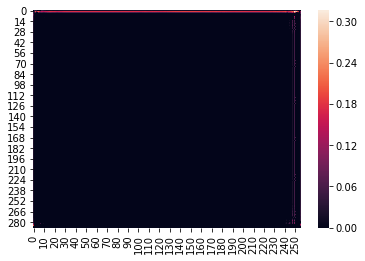

In [181]:
sn.heatmap(res[:,:,1])

In [19]:
res=res*255

In [20]:
resRI=res.astype('uint8')

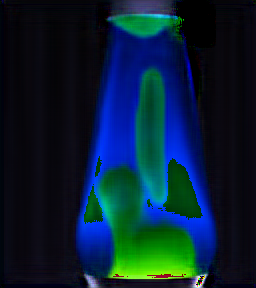

In [21]:
Image.fromarray(resRI)